### PDE 的数值解法--差分法


基本公式(连续情况)：$u_{xx} = \frac{1}{h^2}(u(x+h,t)-2u(x,t)+u(x-h,t))+o(x^2)$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# plt.style.use("_mpl-gallery")


# boundary condition when t=0
def boundary(x):
    return np.sin(2 * np.pi * x) ** 2


D = 1
m = 250
n = 10
sigma = 0.4

mesh = np.zeros((m, n))
# boundary condition when x=0 and x=1
mesh[:, 0] = 0
mesh[:, 9] = 0

for i in range(m - 1):
    for j in range(1, n - 1):
        if i == 0:
            mesh[0, j] = boundary(j / 250)
        mesh[i + 1, j] = (
            sigma * mesh[i, j + 1]
            + (1 - 2 * sigma) * mesh[i, j]
            + sigma * mesh[i, j - 1]
        )

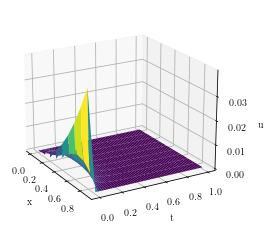

In [6]:
# plot the mesh
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams["text.usetex"] = True

X = np.arange(0, 1, 1 / 10)
Y = np.arange(0, 1, 1 / 250)
X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, mesh, cmap="viridis")
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u")
ax.view_init(elev=20, azim=-30)  # 调整视角

plt.savefig("solve_problem.svg", dpi=1200)
plt.show()